C:\Users\ozzyo\AppData\Local\Temp\ipykernel_26900\1316202640.py:85: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\ozzyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
C:\Users\ozzyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


C:\Users\ozzyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 476ms/step - accuracy: 0.6475 - loss: 0.9381 - val_accuracy: 0.8650 - val_loss: 0.4100
Epoch 2/20
  1/101 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.7500 - loss: 1.0006

C:\Users\ozzyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7500 - loss: 1.0006 - val_accuracy: 0.8687 - val_loss: 0.4091
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 432ms/step - accuracy: 0.8221 - loss: 0.4606 - val_accuracy: 0.8969 - val_loss: 0.3489
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9375 - loss: 0.2329 - val_accuracy: 0.8969 - val_loss: 0.3484
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 424ms/step - accuracy: 0.8487 - loss: 0.4297 - val_accuracy: 0.9080 - val_loss: 0.3157
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8125 - loss: 0.3658 - val_accuracy: 0.9067 - val_loss: 0.3144
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 451ms/step - accuracy: 0.8590 - loss: 0.3674 - val_accuracy: 0.9092 - val_loss: 0.3028
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.8750 - loss: 0.2315 - val_accuracy: 0.9067 - val_loss: 0.3027
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 433ms/step - accuracy: 0.8612 - loss: 0.3861 - val_accurac

C:\Users\ozzyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step
[INFO] Classification Report
                       precision    recall  f1-score   support

            with_mask       0.95      0.97      0.96       647
         without_mask       0.82      0.87      0.85       143
mask_weared_incorrect       0.75      0.12      0.21        25

             accuracy                           0.92       815
            macro avg       0.84      0.65      0.67       815
         weighted avg       0.92      0.92      0.91       815

[INFO] Confusion Matrix
[[625  21   1]
 [ 18 125   0]
 [ 16   6   3]]


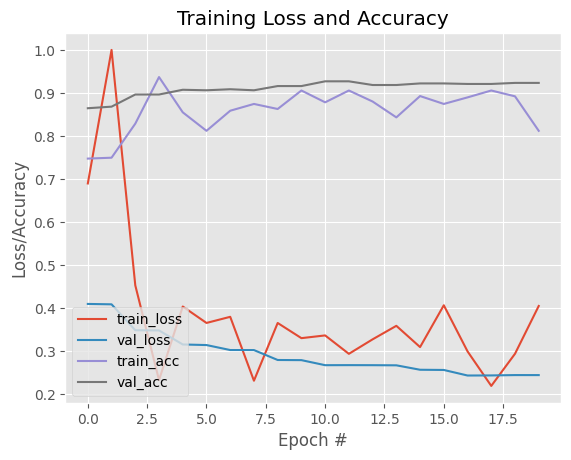

In [1]:
# Protective Face Mask Detection using Deep Learning (Kaggle Dataset - XML Annotations)

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import xml.etree.ElementTree as ET

# Set paths
data_dir = "images"
annotation_dir = "annotations"

# Load and preprocess the data
data = []
labels = []
label_map = {"with_mask": 0, "without_mask": 1, "mask_weared_incorrect": 2}

# Parse XML files
for xml_file in os.listdir(annotation_dir):
    if not xml_file.endswith(".xml"):
        continue

    tree = ET.parse(os.path.join(annotation_dir, xml_file))
    root = tree.getroot()

    filename = root.find("filename").text
    img_path = os.path.join(data_dir, filename)
    image = cv2.imread(img_path)
    if image is None:
        continue

    for obj in root.findall("object"):
        class_label = obj.find("name").text
        if class_label not in label_map:
            continue

        bbox = obj.find("bndbox")
        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)

        face = image[y_min:y_max, x_min:x_max]
        if face.size == 0:
            continue
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = preprocess_input(face)

        data.append(face)
        labels.append(label_map[class_label])

# Convert to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=3)

# Split the data
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

# Data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Build the model using MobileNetV2 as the base
baseModel = MobileNetV2(weights="imagenet", include_top=False,
                        input_tensor=Input(shape=(224, 224, 3)))

# Freeze the base model
baseModel.trainable = False

# Build the head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# Final model
model = Model(inputs=baseModel.input, outputs=headModel)

# Compile the model
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

# Evaluate the model
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

print("[INFO] Classification Report")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=list(label_map.keys())))

# Confusion matrix
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
print("[INFO] Confusion Matrix")
print(cm)

# Plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

### Download the model

In [2]:
model.save("mask_detector_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("mask_detector_model.h5")


### Test 1

#### Image for test:

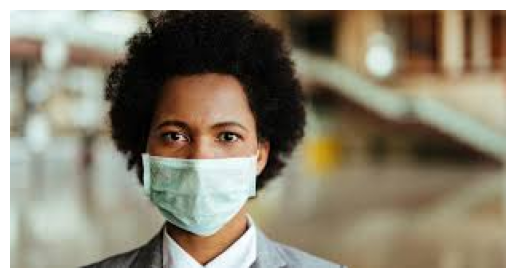

In [20]:
img = mpimg.imread('test1.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Testing model

In [22]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
# Download the model
model = load_model("mask_detector_model.h5")

# Download and preprocess the image
image = cv2.imread("test1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype("float32")
image = np.expand_dims(image, axis=0)  
image = (image - 127.5) / 127.5         

# Predict the class
pred = model.predict(image)
pred_class = np.argmax(pred, axis=1)[0]

# Map the class index to the label
class_labels = {0: "With Mask", 1: "Without Mask", 2: "Mask Worn Incorrectly"}

print(f"Prediction: {class_labels[pred_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Prediction: With Mask


### Test 2

#### Image for test:

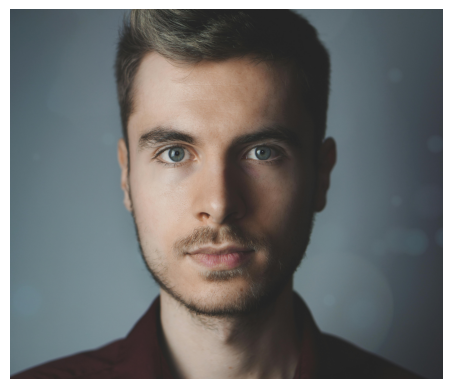

In [34]:
img = mpimg.imread('test2.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Testing model

In [35]:
# Download the model
model = load_model("mask_detector_model.h5")

# Download and preprocess the image
image = cv2.imread("test2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype("float32")
image = np.expand_dims(image, axis=0)  
image = (image - 127.5) / 127.5         

# Predict the class
pred = model.predict(image)
pred_class = np.argmax(pred, axis=1)[0]

# Map the class index to the label
class_labels = {0: "With Mask", 1: "Without Mask", 2: "Mask Worn Incorrectly"}

print(f"Prediction: {class_labels[pred_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Prediction: Without Mask


### Test 3

#### Image for test:

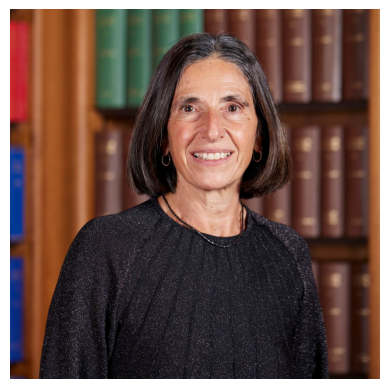

In [24]:
img = mpimg.imread('test3.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Testing model

In [29]:
# Download the model
model = load_model("mask_detector_model.h5")

# Download and preprocess the image
image = cv2.imread("test3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype("float32")
image = np.expand_dims(image, axis=0)  
image = (image - 127.5) / 127.5         

# Predict the class
pred = model.predict(image)
pred_class = np.argmax(pred, axis=1)[0]

# Map the class index to the label
class_labels = {0: "With Mask", 1: "Without Mask", 2: "Mask Worn Incorrectly"}

print(f"Prediction: {class_labels[pred_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
Prediction: Without Mask


### Test 4

#### Image for test:

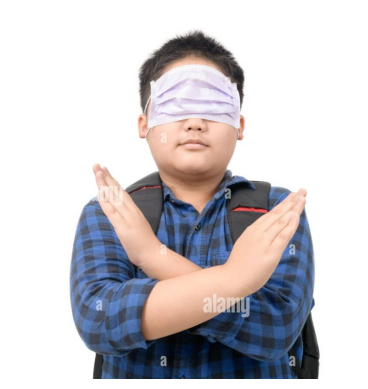

In [26]:
img = mpimg.imread('test4.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Testing model

In [1]:
# Download the model
model = load_model("mask_detector_model.h5")

# Download and preprocess the image
image = cv2.imread("test4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype("float32")
image = np.expand_dims(image, axis=0)  
image = (image - 127.5) / 127.5         

# Predict the class
pred = model.predict(image)
pred_class = np.argmax(pred, axis=1)[0]

# Map the class index to the label
class_labels = {0: "With Mask", 1: "Without Mask", 2: "Mask Worn Incorrectly"}

print(f"Prediction: {class_labels[pred_class]}")


NameError: name 'load_model' is not defined

#### **Incorrect Predictions**
##### The model exhibited error due to a lack of training examples specifically featuring incorrectly worn masks.

### Test 5

#### Image for test:

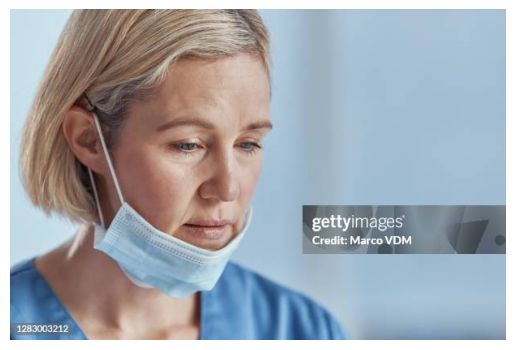

In [27]:
img = mpimg.imread('test5.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

#### Testing model

In [36]:
# Download the model
model = load_model("mask_detector_model.h5")

# Download and preprocess the image
image = cv2.imread("test5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype("float32")
image = np.expand_dims(image, axis=0)  
image = (image - 127.5) / 127.5         

# Predict the class
pred = model.predict(image)
pred_class = np.argmax(pred, axis=1)[0]

# Map the class index to the label
class_labels = {0: "With Mask", 1: "Without Mask", 2: "Mask Worn Incorrectly"}

print(f"Prediction: {class_labels[pred_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
Prediction: Mask Worn Incorrectly
